In [1]:
import scanpy as sc
import decoupler as dc

# Only needed for processing
import numpy as np
import pandas as pd
from anndata import AnnData

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
experiment = "GSE164471_MAvY_DDS"
comparison = 'young.vs.middleage'

In [3]:
results_df =  pd.read_csv(f'/home/amore/work/data/{experiment}.csv')
results_df = results_df.set_index('row')
results_df.drop(columns=['Unnamed: 0'],inplace=True)
results_df.index.name = 'GeneName'
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GeneName,,,,,,
ENSG00000000003.14,175.685322,-0.049808,0.230487,-0.216097,0.828912,0.957591
ENSG00000000005.5,1.797225,0.425876,0.968858,0.439565,0.660252,NaN
ENSG00000000419.12,162.870939,-0.194526,0.228771,-0.850309,0.395153,0.830629
ENSG00000000457.13,120.250411,-0.208984,0.268479,-0.778400,0.436333,0.841090
ENSG00000000460.16,295.833043,0.182003,0.220999,0.823547,0.410197,0.833987
...,...,...,...,...,...,...
ENSG00000285480.1,1.621407,-0.024949,1.324500,-0.018836,0.984972,NaN
ENSG00000285491.1,1.489357,1.778577,1.351951,1.315564,0.188320,NaN
ENSG00000285505.1,0.408963,1.297987,1.624595,0.798960,0.424313,NaN


In [4]:
ensembl_names = results_df.index
ensembl_names = ensembl_names.to_list()

In [5]:
# Retrieve gene symbols
annot = sc.queries.biomart_annotations("hsapiens",
        ["ensembl_gene_id", "external_gene_name"],
        use_cache=False
    ).set_index("ensembl_gene_id")


In [6]:
ensembl_names = [item for item in ensembl_names if item.split('.')[0] in annot.index]


In [7]:
results_df = results_df.query('index in @ensembl_names')

In [8]:
ensembl_names = [element.split('.')[0] for element in ensembl_names]


In [9]:
# Assign gene symbols
results_df['gene_symbol'] = [annot.loc[ensembl_id,'external_gene_name'] for ensembl_id in ensembl_names]
results_df

/tmp/ipykernel_29878/2304745235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['gene_symbol'] = [annot.loc[ensembl_id,'external_gene_name'] for ensembl_id in ensembl_names]


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_symbol
GeneName,,,,,,,
ENSG00000000003.14,175.685322,-0.049808,0.230487,-0.216097,0.828912,0.957591,TSPAN6
ENSG00000000005.5,1.797225,0.425876,0.968858,0.439565,0.660252,NaN,TNMD
ENSG00000000419.12,162.870939,-0.194526,0.228771,-0.850309,0.395153,0.830629,DPM1
ENSG00000000457.13,120.250411,-0.208984,0.268479,-0.778400,0.436333,0.841090,SCYL3
ENSG00000000460.16,295.833043,0.182003,0.220999,0.823547,0.410197,0.833987,FIRRM
...,...,...,...,...,...,...,...
ENSG00000285480.1,1.621407,-0.024949,1.324500,-0.018836,0.984972,NaN,H2BK1
ENSG00000285491.1,1.489357,1.778577,1.351951,1.315564,0.188320,NaN,OR1Q1BP
ENSG00000285505.1,0.408963,1.297987,1.624595,0.798960,0.424313,NaN,NaN


In [10]:
results_df.to_csv(f'/home/amore/work/data/{experiment}_gene_symbol.csv')

In [11]:
results_df = results_df.set_index('gene_symbol')
results_df.index.name = 'GeneName'
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GeneName,,,,,,
TSPAN6,175.685322,-0.049808,0.230487,-0.216097,0.828912,0.957591
TNMD,1.797225,0.425876,0.968858,0.439565,0.660252,NaN
DPM1,162.870939,-0.194526,0.228771,-0.850309,0.395153,0.830629
SCYL3,120.250411,-0.208984,0.268479,-0.778400,0.436333,0.841090
FIRRM,295.833043,0.182003,0.220999,0.823547,0.410197,0.833987
...,...,...,...,...,...,...
H2BK1,1.621407,-0.024949,1.324500,-0.018836,0.984972,NaN
OR1Q1BP,1.489357,1.778577,1.351951,1.315564,0.188320,NaN
NaN,0.408963,1.297987,1.624595,0.798960,0.424313,NaN


In [12]:
def make_index_unique(df):
    # Create a dictionary to keep track of the counts
    counts = {}
    
    def unique_index(index):
        if index in counts:
            counts[index] += 1
            return f"{index}_{counts[index]}"
        else:
            counts[index] = 0
            return index
    
    # Apply the unique_index function to each index value
    new_index = [unique_index(idx) for idx in df.index]
    df.index = new_index


In [13]:
results_df = results_df[results_df.index.notnull()]
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GeneName,,,,,,
TSPAN6,175.685322,-0.049808,0.230487,-0.216097,0.828912,0.957591
TNMD,1.797225,0.425876,0.968858,0.439565,0.660252,NaN
DPM1,162.870939,-0.194526,0.228771,-0.850309,0.395153,0.830629
SCYL3,120.250411,-0.208984,0.268479,-0.778400,0.436333,0.841090
FIRRM,295.833043,0.182003,0.220999,0.823547,0.410197,0.833987
...,...,...,...,...,...,...
TUSC2P1,0.132631,0.585087,3.172873,0.184403,0.853697,NaN
OR4M2-OT1,3.172226,0.095544,1.197045,0.079817,0.936383,NaN
H2BK1,1.621407,-0.024949,1.324500,-0.018836,0.984972,NaN


In [14]:

make_index_unique(results_df)

In [15]:
results_df = results_df.dropna()
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,175.685322,-0.049808,0.230487,-0.216097,0.828912,0.957591
DPM1,162.870939,-0.194526,0.228771,-0.850309,0.395153,0.830629
SCYL3,120.250411,-0.208984,0.268479,-0.778400,0.436333,0.841090
FIRRM,295.833043,0.182003,0.220999,0.823547,0.410197,0.833987
FGR,18.763385,0.377124,0.515070,0.732180,0.464058,0.845462
...,...,...,...,...,...,...
OR11J6P,18.022689,-0.274647,0.944019,-0.290934,0.771102,0.940642
PDGFRL2P,9.210927,-0.751170,0.689271,-1.089805,0.275799,0.805466
POLR2J3_1,1511.002799,-0.190077,0.194396,-0.977783,0.328182,0.818797
C4orf36_1,347.370170,0.174586,0.370647,0.471030,0.637619,0.901866


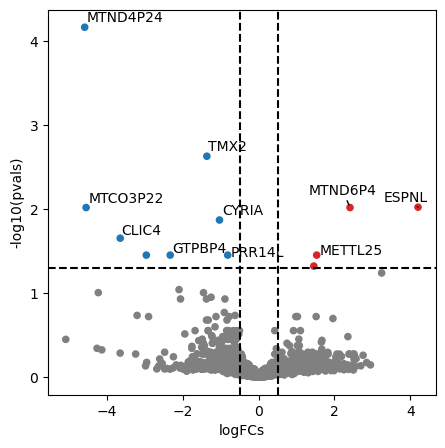

In [16]:
dc.plot_volcano_df(
    results_df,
    x='log2FoldChange',
    y='padj',
    top=10,
    figsize=(5, 5)
)

In [17]:
mat = results_df[['stat']].T.rename(index={'stat': comparison})
mat

,TSPAN6,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,...,OR4H6BP,THSD1P1,PDE4C_1,OOSP3,ABCF2-H2BK1,OR11J6P,PDGFRL2P,POLR2J3_1,C4orf36_1,TBCEL-TECTA
young.vs.middleage,-0.216097,-0.850309,-0.7784,0.823547,0.73218,1.300634,0.460345,-0.628157,-1.016378,0.857304,...,0.648509,-1.160598,0.507305,1.208897,-1.650777,-0.290934,-1.089805,-0.977783,0.47103,-0.661925


In [18]:
collectri = dc.get_collectri(organism='human', split_complexes=False)
collectri

,source,target,weight,PMID
0,MYC,TERT,1,10022128;10491298;10606235;10637317;10723141;1...
1,SPI1,BGLAP,1,10022617
2,SMAD3,JUN,1,10022869;12374795
3,SMAD4,JUN,1,10022869;12374795
4,STAT5A,IL2,1,10022878;11435608;17182565;17911616;22854263;2...
...,...,...,...,...
43173,NFKB,hsa-miR-143-3p,1,19472311
43174,AP1,hsa-miR-206,1,19721712
43175,NFKB,hsa-miR-21-5p,1,20813833;22387281
43176,NFKB,hsa-miR-224-5p,1,23474441;23988648


In [19]:
# Infer TF activities with ulm
tf_acts, tf_pvals = dc.run_ulm(mat=mat, net=collectri, verbose=True)
tf_acts

Running ulm on mat with 1 samples and 18244 targets for 688 sources.


,ABL1,AHR,AIP,AIRE,AP1,APEX1,AR,ARID1A,ARID1B,ARID3A,...,ZNF362,ZNF382,ZNF384,ZNF395,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91,ZXDC
young.vs.middleage,-0.259054,0.256422,0.12763,1.706539,-3.205193,-0.502371,-4.942704,-1.588408,0.960041,0.263229,...,-1.947352,1.089465,-0.983566,-0.534556,-1.640045,-0.702148,-0.677438,-0.807104,-0.209226,0.394685


In [20]:
values = tf_acts.iloc[0]
values

ABL1      -0.259054
AHR        0.256422
AIP        0.127630
AIRE       1.706539
AP1       -3.205193
             ...   
ZNF699    -0.702148
ZNF76     -0.677438
ZNF804A   -0.807104
ZNF91     -0.209226
ZXDC       0.394685
Name: young.vs.middleage, Length: 688, dtype: float32

In [21]:
down_reg = values.sort_values(ascending=True)[:5].index.to_list()

In [22]:
up_reg = values.sort_values(ascending=False)[:5].index.to_list()

In [23]:
up_down_reg = down_reg.copy()

In [24]:
up_down_reg.extend(up_reg)
up_down_reg

['MYC',
 'TP53',
 'AR',
 'MYOD1',
 'ESR1',
 'HNF1A',
 'RXRA',
 'BCL11A',
 'BCOR',
 'HOXB13']

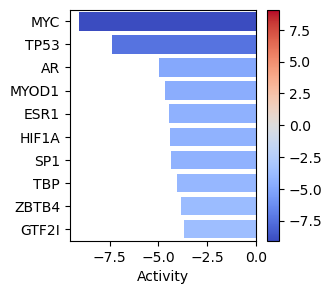

In [25]:
dc.plot_barplot(
    acts=tf_acts,
    contrast=comparison,
    top=10,
    vertical=True,
    figsize=(3, 3)
)

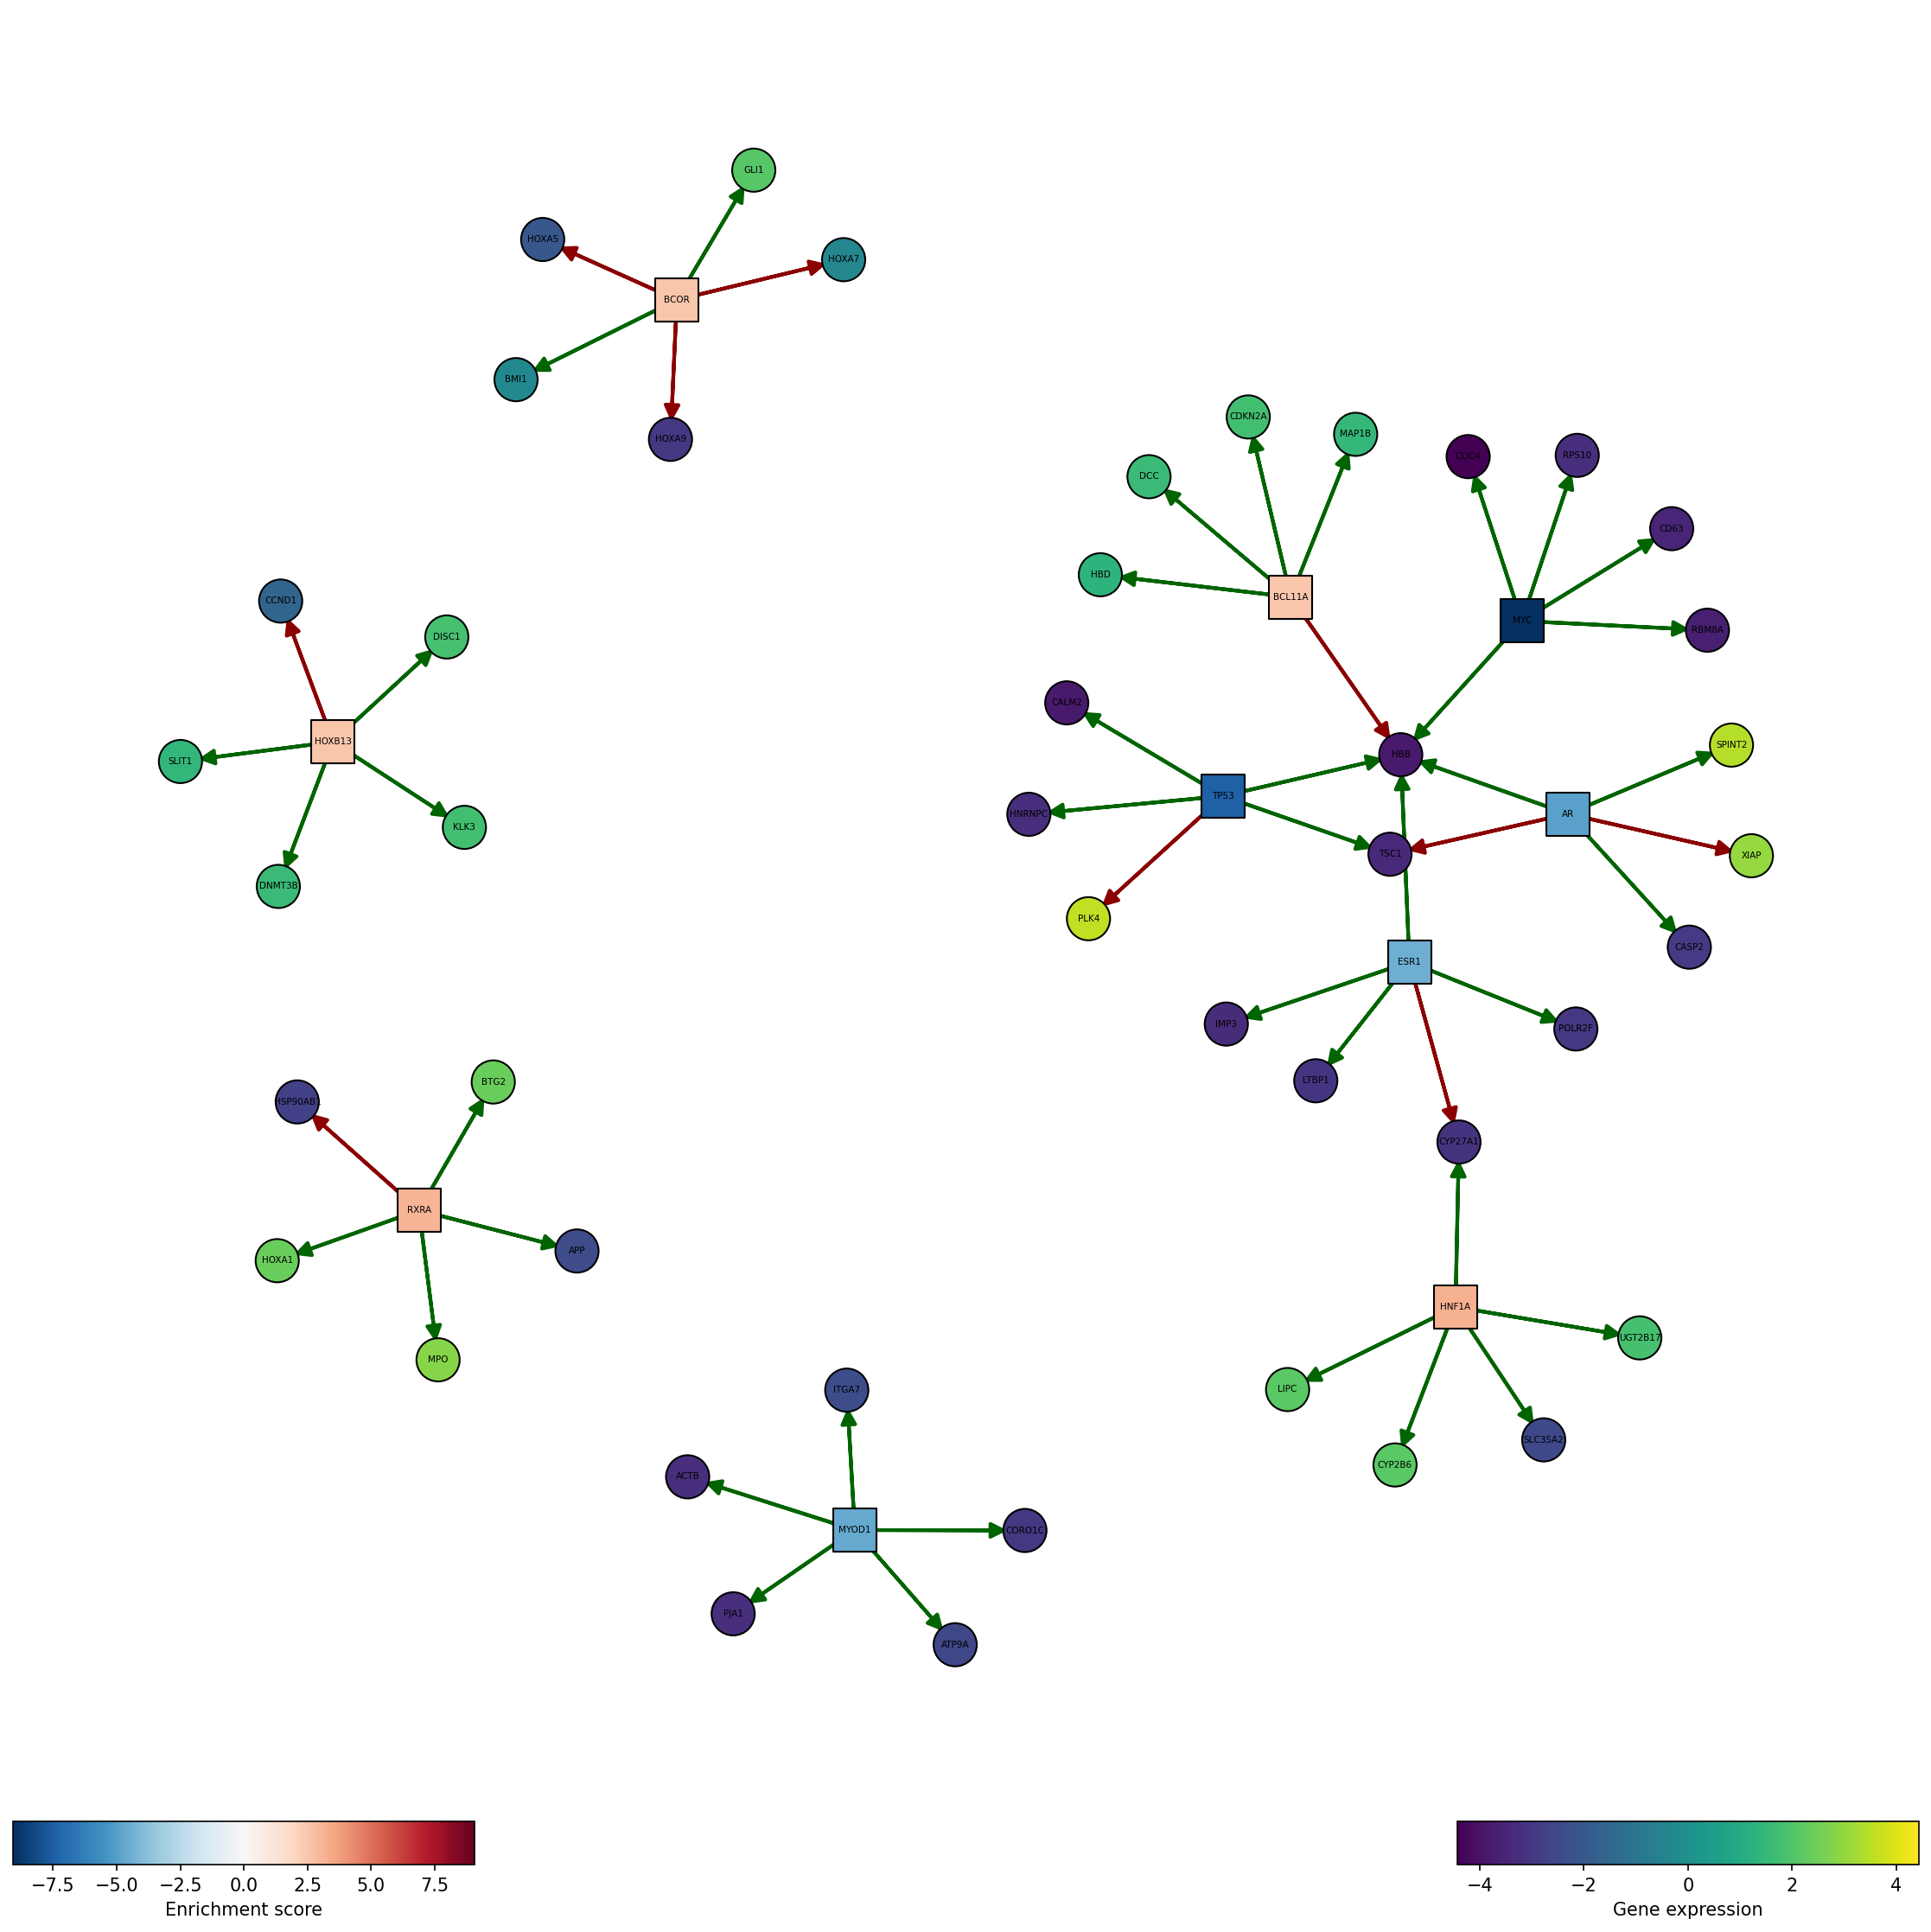

In [26]:
dc.plot_network(
    net=collectri,
    obs=mat,
    act=tf_acts,
    n_sources=up_down_reg,
    n_targets=5,
    node_size=50,
    figsize=(15, 15),
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    vcenter=True,
    save=f'/home/amore/work/figures/{experiment}_network_TF.jpg'
)

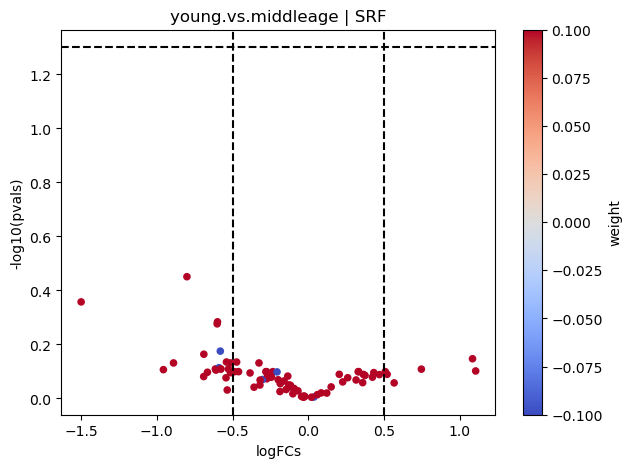

In [27]:
# Extract logFCs and pvals
logFCs = results_df[['log2FoldChange']].T.rename(index={'log2FoldChange': comparison})
pvals = results_df[['padj']].T.rename(index={'padj': comparison})

# Plot
dc.plot_volcano(
    logFCs,
    pvals,
    comparison,
    name='SRF',
    net=collectri,
    top=10,
    sign_thr=0.05,
    lFCs_thr=0.5
)

In [28]:
# Retrieve PROGENy model weights
progeny = dc.get_progeny(top=500)
progeny

,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
6995,p53,ZMYM4,-2.325752,1.522388e-06
6996,p53,CFDP1,-1.628168,1.526045e-06
6997,p53,VPS37D,2.309503,1.537098e-06
6998,p53,TEDC1,-2.274823,1.547037e-06


In [29]:
# Infer pathway activities with mlm
pathway_acts, pathway_pvals = dc.run_mlm(mat=mat, net=progeny, verbose=True)
pathway_acts

Running mlm on mat with 1 samples and 18244 targets for 14 sources.


,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
young.vs.middleage,-1.939391,0.277818,-0.242967,1.398412,0.186577,-0.236442,1.768878,3.271065,-4.452781,-1.757373,4.599152,-1.779292,1.057927,-0.575009


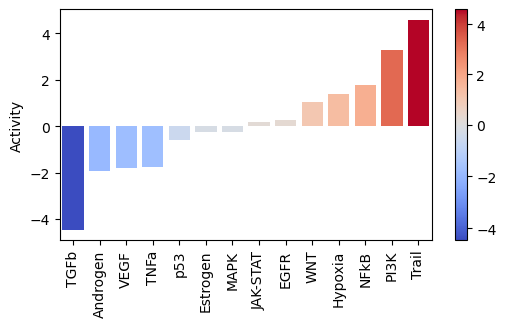

In [30]:
dc.plot_barplot(
    pathway_acts,
    comparison,
    top=25,
    vertical=False,
    figsize=(6, 3)
)

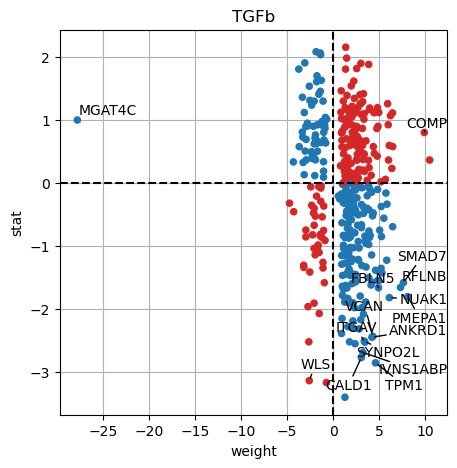

In [31]:
dc.plot_targets(results_df, stat='stat', source_name='TGFb', net=progeny, top=15)


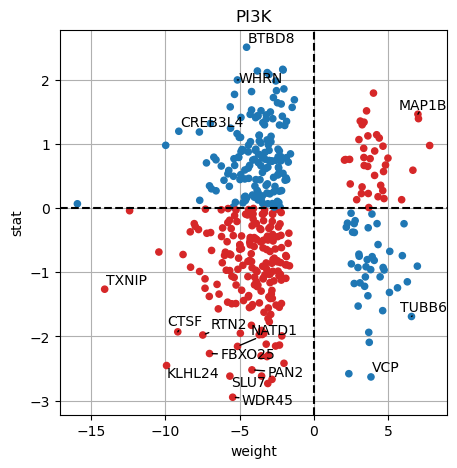

In [32]:
dc.plot_targets(results_df, stat='stat', source_name='PI3K', net=progeny, top=15)


In [33]:
msigdb = dc.get_resource('MSigDB')
msigdb

,genesymbol,collection,geneset
0,MAFF,chemical_and_genetic_perturbations,BOYAULT_LIVER_CANCER_SUBCLASS_G56_DN
1,MAFF,chemical_and_genetic_perturbations,ELVIDGE_HYPOXIA_UP
2,MAFF,chemical_and_genetic_perturbations,NUYTTEN_NIPP1_TARGETS_DN
3,MAFF,immunesigdb,GSE17721_POLYIC_VS_GARDIQUIMOD_4H_BMDC_DN
4,MAFF,chemical_and_genetic_perturbations,SCHAEFFER_PROSTATE_DEVELOPMENT_12HR_UP
...,...,...,...
3838543,PRAMEF22,go_biological_process,GOBP_POSITIVE_REGULATION_OF_CELL_POPULATION_PR...
3838544,PRAMEF22,go_biological_process,GOBP_APOPTOTIC_PROCESS
3838545,PRAMEF22,go_biological_process,GOBP_REGULATION_OF_CELL_DEATH
3838546,PRAMEF22,go_biological_process,GOBP_NEGATIVE_REGULATION_OF_DEVELOPMENTAL_PROCESS


In [34]:
# Filter by hallmark
msigdb = msigdb[msigdb['collection']=='hallmark']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

# Rename
msigdb.loc[:, 'geneset'] = [name.split('HALLMARK_')[1] for name in msigdb['geneset']]

msigdb

,genesymbol,collection,geneset
233,MAFF,hallmark,IL2_STAT5_SIGNALING
250,MAFF,hallmark,COAGULATION
270,MAFF,hallmark,HYPOXIA
373,MAFF,hallmark,TNFA_SIGNALING_VIA_NFKB
377,MAFF,hallmark,COMPLEMENT
...,...,...,...
1449668,STXBP1,hallmark,PANCREAS_BETA_CELLS
1450315,ELP4,hallmark,PANCREAS_BETA_CELLS
1450526,GCG,hallmark,PANCREAS_BETA_CELLS
1450731,PCSK2,hallmark,PANCREAS_BETA_CELLS


In [35]:
# Infer enrichment with ora using significant deg
top_genes = results_df[results_df['padj'] < 0.05]

# Run ora
enr_pvals = dc.get_ora_df(
    df=top_genes,
    net=msigdb,
    source='geneset',
    target='genesymbol'
)

enr_pvals.head()

,Term,Set size,Overlap ratio,p-value,FDR p-value,Odds ratio,Combined score,Features


ValueError: s must be a scalar, or float array-like with the same size as x and y

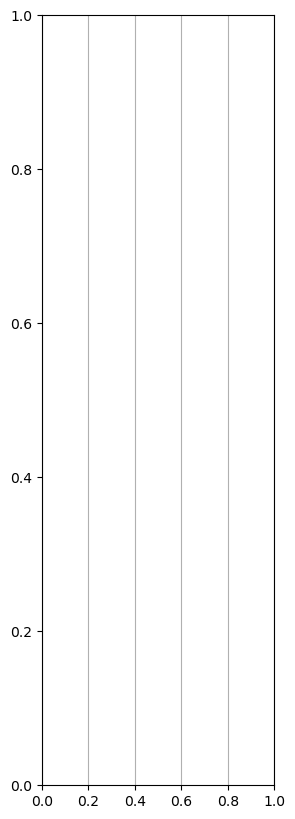

In [36]:
dc.plot_dotplot(
    enr_pvals.sort_values('Combined score', ascending=False).head(15),
    x='Combined score',
    y='Term',
    s='Odds ratio',
    c='FDR p-value',
    scale=0.5,
    figsize=(3, 10)
)

In [ ]:
dc.plot_running_score(
    df=results_df,
    stat='stat',
    net=msigdb,
    source='geneset',
    target='genesymbol',
    set_name='TNFA_SIGNALING_VIA_NFKB'
)

In [ ]:
dc.plot_running_score(
    df=results_df,
    stat='stat',
    net=msigdb,
    source='geneset',
    target='genesymbol',
    set_name='MYOGENESIS'
)

In [ ]:
import liana as ln

liana_lr = ln.resource.select_resource()
liana_lr = ln.resource.explode_complexes(liana_lr)

# Create two new DataFrames, each containing one of the pairs of columns to be concatenated
df1 = liana_lr[['interaction', 'ligand']]
df2 = liana_lr[['interaction', 'receptor']]

# Rename the columns in each new DataFrame
df1.columns = ['interaction', 'genes']
df2.columns = ['interaction', 'genes']

# Concatenate the two new DataFrames
liana_lr = pd.concat([df1, df2], axis=0)
liana_lr['weight'] = 1

# Find duplicated rows
duplicates = liana_lr.duplicated()

# Remove duplicated rows
liana_lr = liana_lr[~duplicates]

liana_lr

In [ ]:
# Infer lr activities with ulm
lr_score, lr_pvalue = dc.run_ulm(
    mat=mat,
    net=liana_lr,
    source='interaction',
    target='genes',
    min_n=2,
    verbose=True
)

In [ ]:
dc.plot_barplot(lr_score, comparison, top=25, vertical=True)
